# 数据清洗

In [2]:
import pandas as pd

# 读取Excel文件中的数据
file_path = './朝阳医院2018年销售数据.xlsx'
xls = pd.ExcelFile(file_path)

# 查看文件中的sheet名称，以确保我们选择了正确的sheet
xls.sheet_names

# 读取第一个sheet的数据
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 查看数据的前几行，以了解数据结构
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [3]:
# 1. 将购药时间拆分为日期和星期，并将日期转换为标准日期格式
# 使用 `str.split(' ')` 拆分日期和星期，取第一个部分进行日期转换
df['购药日期'] = pd.to_datetime(df['购药时间'].str.split(' ').str[0], errors='coerce')

# 2. 处理无效日期
# 使用 `errors='coerce'` 将无法转换的日期变为 NaT（即空值），然后删除这些无效数据
df_cleaned = df.dropna(subset=['购药日期'])

# 3. 检查是否有缺失值
# 统计各列的缺失值数量
missing_values = df_cleaned.isnull().sum()

# 4. 处理社保卡号的缺失值
# 删除社保卡号为空的行
df_cleaned = df_cleaned.dropna(subset=['社保卡号'])

# 5. 检查清理后的数据是否还有缺失值
# 重新统计各列的缺失值数量，确保所有缺失值已处理
missing_values_final_check = df_cleaned.isnull().sum()

# 6. 查看清理后的数据，确保数据清理正确
df_cleaned.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,购药日期
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00,2018-01-01
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64,2018-01-02
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00,2018-01-06
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00,2018-01-11
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00,2018-01-15


# 数据探索性分析（EDA）

In [4]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载用户提供的中文字体
font_path = 'C:/Windows/Fonts/simhei.ttf'
chinese_font = FontProperties(fname=font_path)

# 确保字体应用在每个图表中
plt.rcParams['font.family'] = chinese_font.get_name()

描述性统计

In [5]:
# 进行描述性统计
desc_stats = df_cleaned[['销售数量', '应收金额', '实收金额']].describe()
print("描述性统计:\n", desc_stats)

描述性统计:
               销售数量        应收金额         实收金额
count  6552.000000  6552.00000  6552.000000
mean      2.384158    50.43025    46.266972
std       2.374754    87.68075    81.043956
min     -10.000000  -374.00000  -374.000000
25%       1.000000    14.00000    12.320000
50%       2.000000    28.00000    26.500000
75%       2.000000    59.60000    53.000000
max      50.000000  2950.00000  2650.000000


销售异常值检测

D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


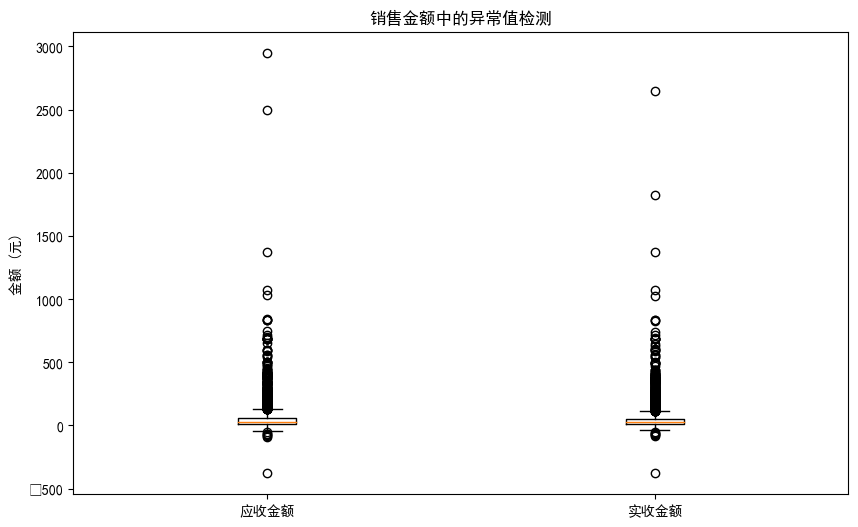

异常值:
        应收金额    实收金额
4     224.0  208.00
7     149.0  131.12
13    140.0  112.00
14    168.0  140.00
17    140.0  112.00
...     ...     ...
6513  140.0  125.00
6523  140.0  134.00
6524  280.0  250.00
6529  168.0  161.28
6535  168.0  161.28

[549 rows x 2 columns]


In [6]:
import matplotlib.pyplot as plt

# 2. 销售额的分布分析（应收金额和实收金额）
sales_distribution = df_cleaned[['应收金额', '实收金额']]

# 使用IQR方法检测异常值
Q1 = sales_distribution.quantile(0.25)
Q3 = sales_distribution.quantile(0.75)
IQR = Q3 - Q1
outliers = sales_distribution[((sales_distribution < (Q1 - 1.5 * IQR)) | (sales_distribution > (Q3 + 1.5 * IQR))).any(axis=1)]

# 可视化销售额中的异常值
plt.figure(figsize=(10, 6))
plt.boxplot([sales_distribution['应收金额'], sales_distribution['实收金额']], labels=['应收金额', '实收金额'])
plt.title('销售金额中的异常值检测')
plt.ylabel('金额 (元)')
plt.show()

# 展示检测到的异常值
print("异常值:\n", outliers)

商品销售排名

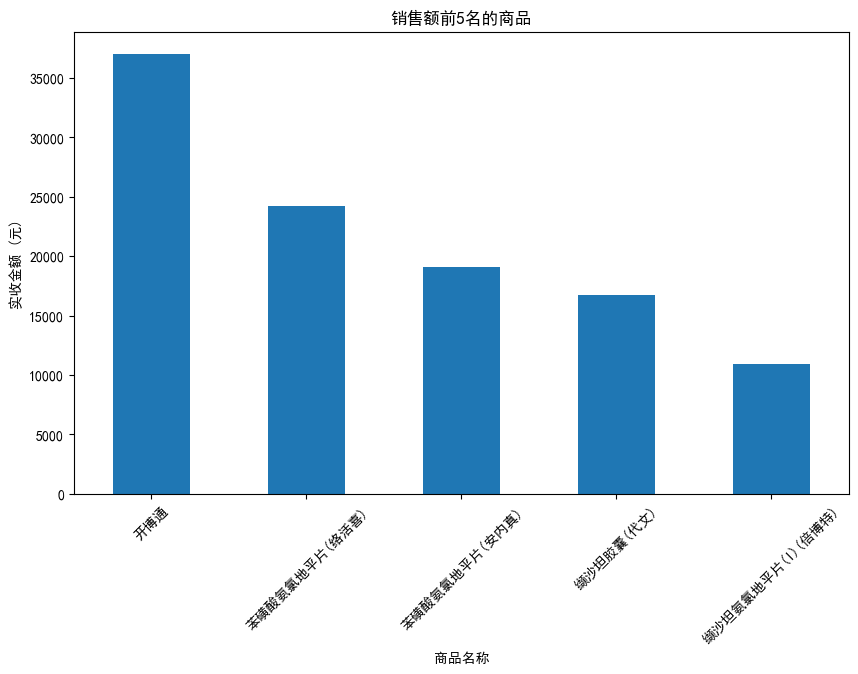

商品销售排名:
                     销售数量     应收金额      实收金额
商品名称                                       
开博通               1438.0  40633.0  37031.08
苯磺酸氨氯地平片(络活喜)      796.0  26249.4  24251.04
苯磺酸氨氯地平片(安内真)     1781.0  22315.0  19081.44
缬沙坦胶囊(代文)          443.0  17647.4  16699.77
缬沙坦氨氯地平片(I)(倍博特)   168.0  11524.8  10923.86


In [7]:
# 统计商品销售数量和金额，并展示前5名
product_sales = df_cleaned.groupby('商品名称').agg({'销售数量': 'sum', '应收金额': 'sum', '实收金额': 'sum'}).sort_values(by='实收金额', ascending=False)

# 可视化商品销售排名
top_products = product_sales.head(5)
plt.figure(figsize=(10, 6))
top_products['实收金额'].plot(kind='bar')
plt.title('销售额前5名的商品')
plt.ylabel('实收金额 (元)')
plt.xlabel('商品名称')
plt.xticks(rotation=45)
plt.show()

# 展示商品销售数据
print("商品销售排名:\n", product_sales.head())


月度销售分析

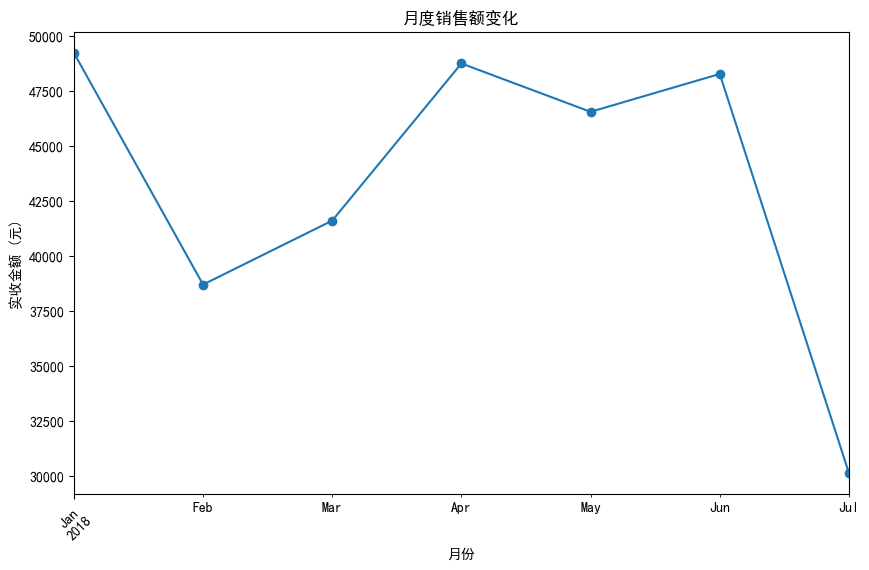

按月销售额统计:
             应收金额      实收金额    销售数量
月份                                
2018-01  53295.0  49215.32  2518.0
2018-02  41907.7  38681.88  1850.0
2018-03  45311.0  41591.21  2224.0
2018-04  54238.3  48736.40  3007.0
2018-05  50875.6  46537.47  2214.0


In [8]:
# 按月统计销售额变化
df_cleaned['月份'] = df_cleaned['购药日期'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('月份').agg({'应收金额': 'sum', '实收金额': 'sum', '销售数量': 'sum'})

# 可视化月度销售变化
plt.figure(figsize=(10, 6))
monthly_sales['实收金额'].plot(kind='line', marker='o')
plt.title('月度销售额变化')
plt.ylabel('实收金额 (元)')
plt.xlabel('月份')
plt.xticks(rotation=45)
plt.show()

# 展示月度销售数据
print("按月销售额统计:\n", monthly_sales.head())


客户消费行为分析

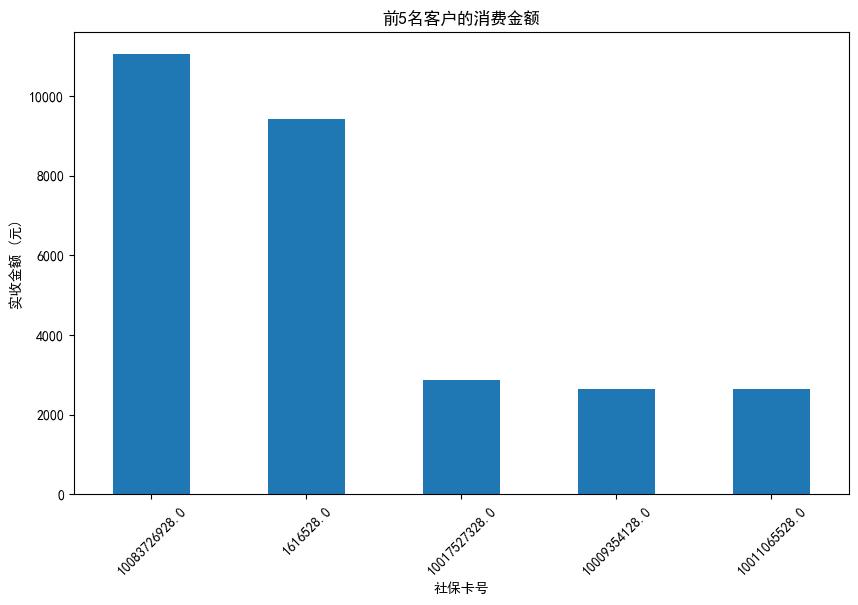

客户消费行为:
                销售数量     应收金额      实收金额
社保卡号                                  
1.008373e+10  424.0  11082.4  11048.34
1.616528e+06  453.0   9705.8   9426.35
1.001753e+10   65.0   3090.0   2880.78
1.000935e+10   50.0   2950.0   2650.00
1.001107e+10   85.0   2859.4   2636.69


In [9]:
# 通过社保卡号统计客户的消费行为
customer_purchase_behavior = df_cleaned.groupby('社保卡号').agg({'销售数量': 'sum', '应收金额': 'sum', '实收金额': 'sum'}).sort_values(by='实收金额', ascending=False)

# 可视化前5名客户的消费金额
top_customers = customer_purchase_behavior.head(5)
plt.figure(figsize=(10, 6))
top_customers['实收金额'].plot(kind='bar')
plt.title('前5名客户的消费金额')
plt.ylabel('实收金额 (元)')
plt.xlabel('社保卡号')
plt.xticks(rotation=45)
plt.show()

# 展示客户消费行为数据
print("客户消费行为:\n", customer_purchase_behavior.head())


# 数据可视化

时间序列分析：销售数据的时间趋势

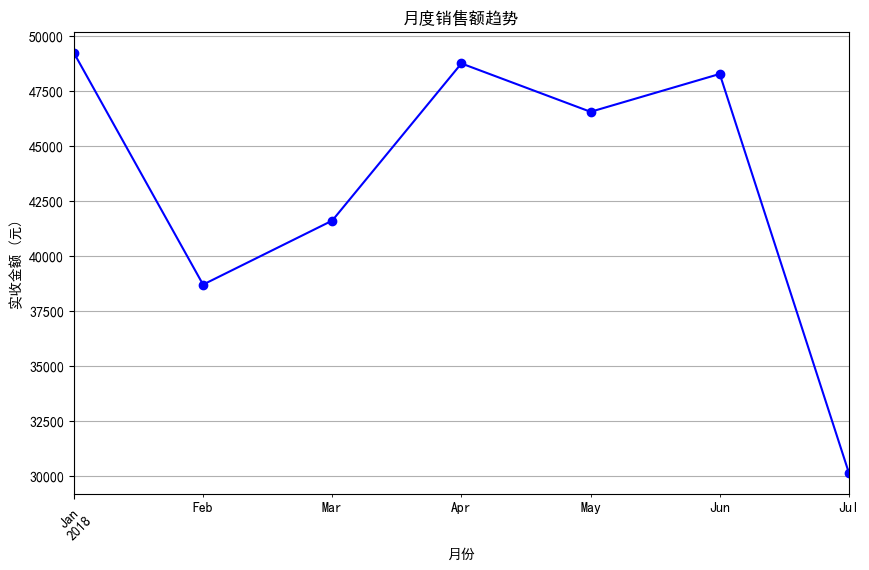

In [10]:
import matplotlib.pyplot as plt

# 按月统计销售额变化
df_cleaned['月份'] = df_cleaned['购药日期'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('月份').agg({'应收金额': 'sum', '实收金额': 'sum', '销售数量': 'sum'})

# 可视化月度销售额变化
plt.figure(figsize=(10, 6))
monthly_sales['实收金额'].plot(kind='line', marker='o', color='b')
plt.title('月度销售额趋势')
plt.ylabel('实收金额 (元)')
plt.xlabel('月份')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 如果你需要按季度或年度进行趋势分析，也可以用以下代码：
# df_cleaned['季度'] = df_cleaned['购药日期'].dt.to_period('Q')  # 按季度
# df_cleaned['年份'] = df_cleaned['购药日期'].dt.to_period('Y')  # 按年份


分类数据

a.按产品销售金额排名

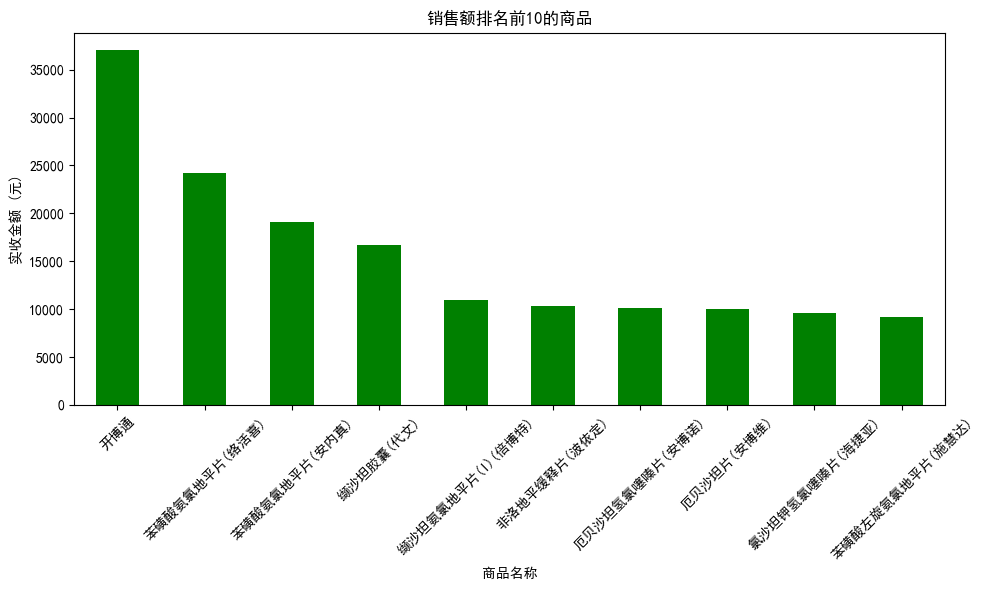

In [11]:
# 统计商品的销售额和销售数量
product_sales = df_cleaned.groupby('商品名称').agg({'销售数量': 'sum', '实收金额': 'sum'}).sort_values(by='实收金额', ascending=False)

# 可视化：商品销售额排名前10的商品
top_10_products = product_sales.head(10)
plt.figure(figsize=(10, 6))
top_10_products['实收金额'].plot(kind='bar', color='green')
plt.title('销售额排名前10的商品')
plt.ylabel('实收金额 (元)')
plt.xlabel('商品名称')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

b.客户分类数据

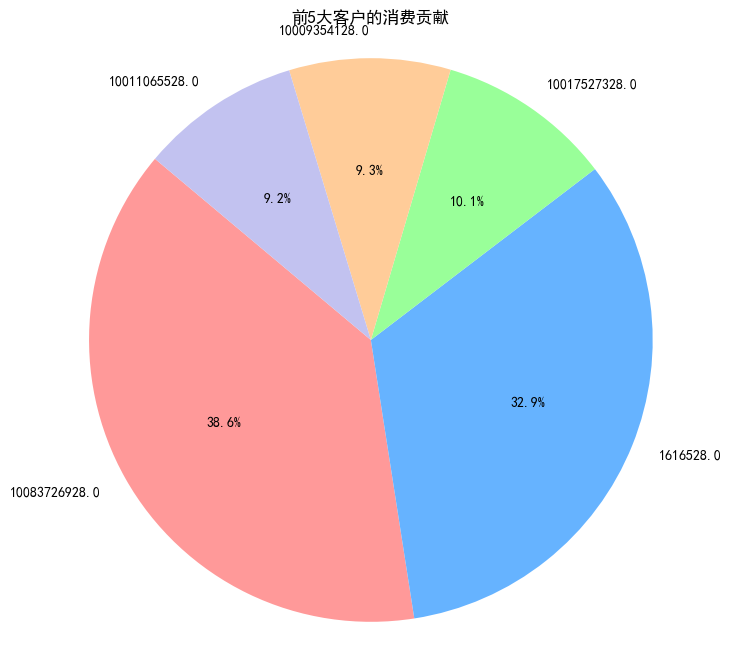

In [12]:
# 通过社保卡号统计客户的消费行为，选取前5大客户的消费金额
top_5_customers = df_cleaned.groupby('社保卡号').agg({'实收金额': 'sum'}).sort_values(by='实收金额', ascending=False).head(5)

# 可视化：前5大客户的消费贡献
plt.figure(figsize=(8, 8))
plt.pie(top_5_customers['实收金额'], labels=top_5_customers.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('前5大客户的消费贡献')
plt.axis('equal')
plt.show()


相关性分析

a.相关性热力图

D:\anaconda\envs\pytorch\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


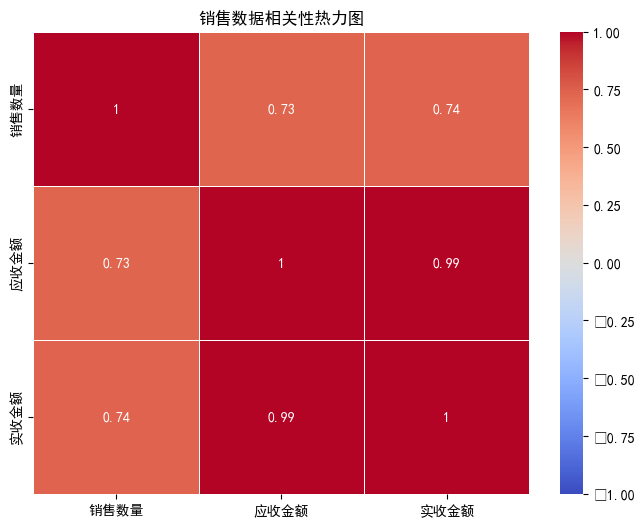

In [13]:
import seaborn as sns
import numpy as np

# 计算相关性矩阵
correlation_matrix = df_cleaned[['销售数量', '应收金额', '实收金额']].corr()

# 可视化相关性热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title('销售数据相关性热力图')
plt.show()


b.销售数量与销售金额的散点图

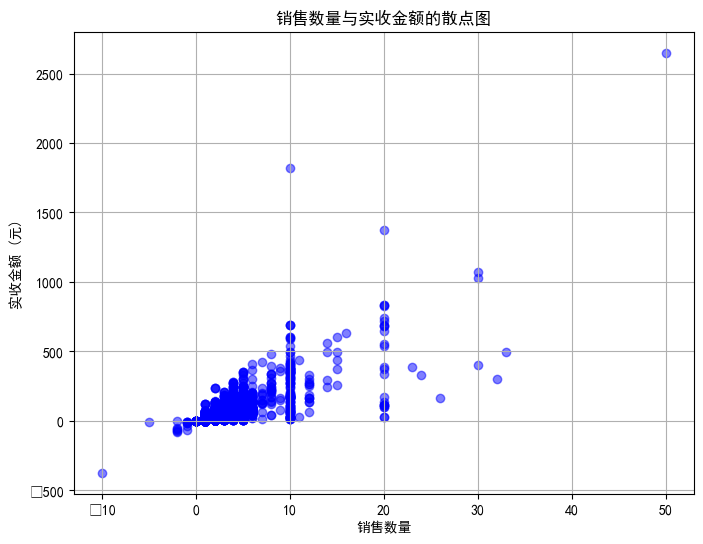

In [14]:
# 可视化：销售数量与实收金额的关系
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['销售数量'], df_cleaned['实收金额'], alpha=0.5, c='blue')
plt.title('销售数量与实收金额的散点图')
plt.xlabel('销售数量')
plt.ylabel('实收金额 (元)')
plt.grid(True)
plt.show()


# 深入分析

 销售趋势分析

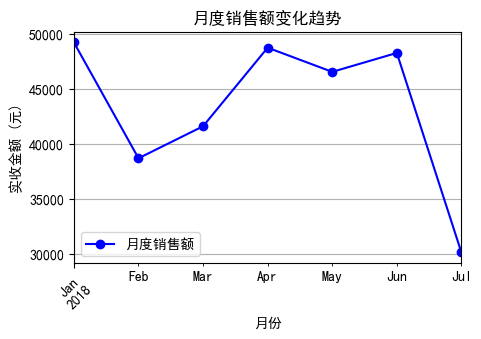

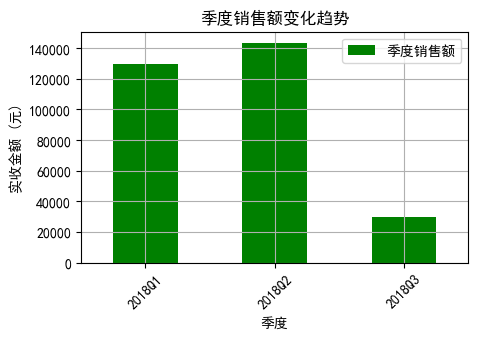

In [15]:
import matplotlib.pyplot as plt

# 按月统计销售额变化
df_cleaned['月份'] = df_cleaned['购药日期'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('月份').agg({'实收金额': 'sum'})

# 按季度统计销售额变化
df_cleaned['季度'] = df_cleaned['购药日期'].dt.to_period('Q')
quarterly_sales = df_cleaned.groupby('季度').agg({'实收金额': 'sum'})

# 可视化：月度销售额趋势
plt.figure(figsize=(5, 3))
monthly_sales['实收金额'].plot(kind='line', marker='o', color='blue', label='月度销售额')
plt.title('月度销售额变化趋势')
plt.ylabel('实收金额 (元)')
plt.xlabel('月份')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 可视化：季度销售额趋势
plt.figure(figsize=(5, 3))
quarterly_sales['实收金额'].plot(kind='bar', color='green', label='季度销售额')
plt.title('季度销售额变化趋势')
plt.ylabel('实收金额 (元)')
plt.xlabel('季度')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

产品/服务分析

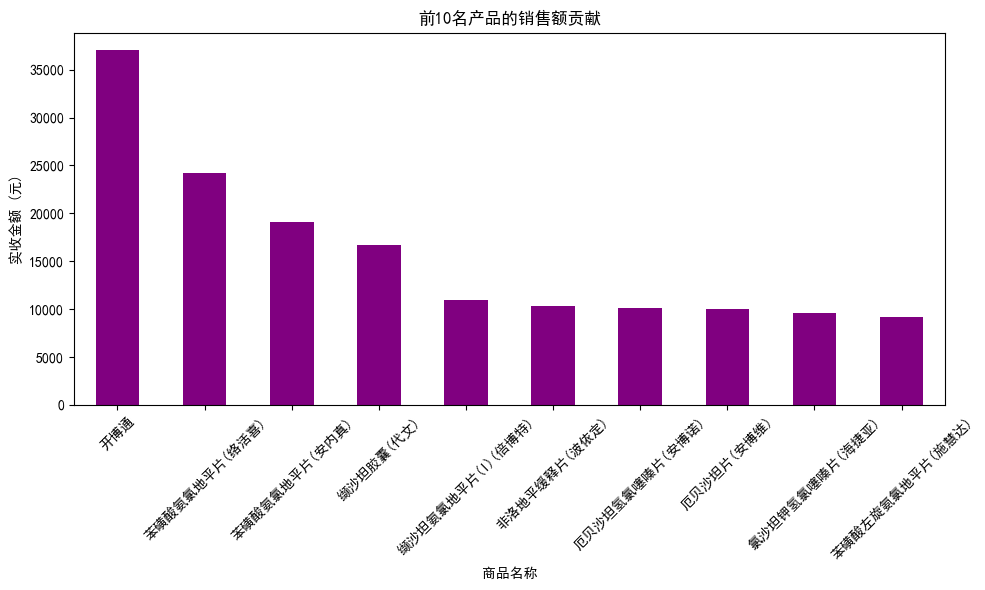

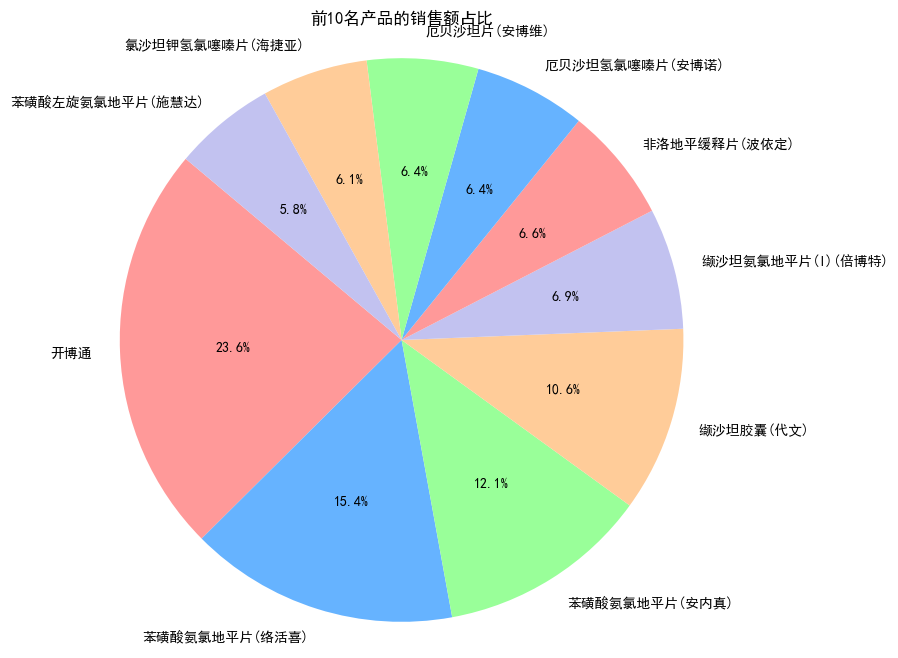

In [16]:
# 统计每种产品的销售额和销售数量
product_sales = df_cleaned.groupby('商品名称').agg({'销售数量': 'sum', '实收金额': 'sum'}).sort_values(by='实收金额', ascending=False)

# 可视化：不同产品的销售额贡献（前10名产品）
top_10_products = product_sales.head(10)
plt.figure(figsize=(10, 6))
top_10_products['实收金额'].plot(kind='bar', color='purple')
plt.title('前10名产品的销售额贡献')
plt.ylabel('实收金额 (元)')
plt.xlabel('商品名称')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 可视化：不同产品的销售占比（饼图）
plt.figure(figsize=(8, 8))
plt.pie(top_10_products['实收金额'], labels=top_10_products.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('前10名产品的销售额占比')
plt.axis('equal')
plt.show()


客户群体分析（RFM 分析）

RFM Data before scoring:
             Recency  Frequency  Monetary
社保卡号                                    
1616528.0         1        248   9426.35
10000428.0      164          1     17.00
10000528.0       62          1     25.00
10001928.0      181          1      2.20
10005028.0        8          9    396.70
R_score added:
             Recency R_score
社保卡号                       
1616528.0         1       4
10000428.0      164       1
10000528.0       62       2
10001928.0      181       1
10005028.0        8       4
F_score added:
             Frequency F_score
社保卡号                         
1616528.0         248       4
10000428.0          1       1
10000528.0          1       1
10001928.0          1       1
10005028.0          9       4
M_score added:
             Monetary M_score
社保卡号                        
1616528.0    9426.35       4
10000428.0     17.00       1
10000528.0     25.00       1
10001928.0      2.20       1
10005028.0    396.70       2
RFM 分析结果：
             Recency

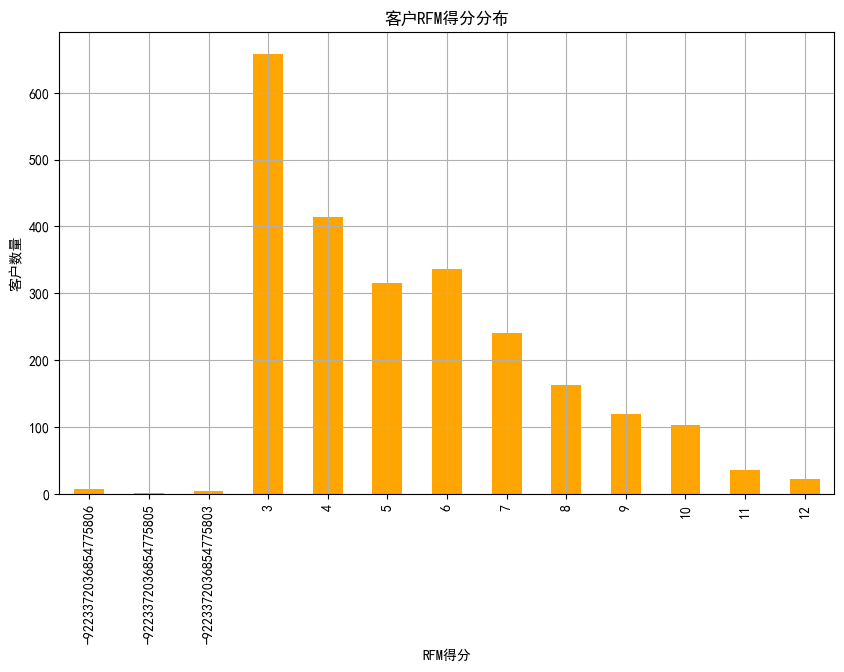

In [17]:
# 创建 RFM 数据集
import datetime as dt

# 计算 Recency: 以最后的购买日期为基准，计算每个客户最后一次购买的时间
snapshot_date = df_cleaned['购药日期'].max() + dt.timedelta(days=1)
rfm_data = df_cleaned.groupby('社保卡号').agg({
    '购药日期': lambda x: (snapshot_date - x.max()).days,  # Recency
    '销售数量': 'count',                                  # Frequency
    '实收金额': 'sum'                                     # Monetary
})

# 重命名列名
rfm_data.rename(columns={'购药日期': 'Recency', '销售数量': 'Frequency', '实收金额': 'Monetary'}, inplace=True)

# 调试：检查 rfm_data 的内容
print("RFM Data before scoring:\n", rfm_data.head())

# 使用 pd.cut 而不是 pd.qcut 来避免重复分位数的问题
try:
    # 使用固定区间进行 R、F、M 打分（手动分割数据）
    rfm_data['R_score'] = pd.cut(rfm_data['Recency'], bins=[0, 30, 60, 90, rfm_data['Recency'].max()], labels=[4, 3, 2, 1])
    print("R_score added:\n", rfm_data[['Recency', 'R_score']].head())  # 检查 R_score

    # 使用固定区间进行 Frequency 打分
    rfm_data['F_score'] = pd.cut(rfm_data['Frequency'], bins=[0, 1, 3, 5, rfm_data['Frequency'].max()], labels=[1, 2, 3, 4])
    print("F_score added:\n", rfm_data[['Frequency', 'F_score']].head())  # 检查 F_score

    # 使用固定区间进行 Monetary 打分
    rfm_data['M_score'] = pd.cut(rfm_data['Monetary'], bins=[0, 100, 500, 1000, rfm_data['Monetary'].max()], labels=[1, 2, 3, 4])
    print("M_score added:\n", rfm_data[['Monetary', 'M_score']].head())  # 检查 M_score

except ValueError as e:
    print(f"Error with cut: {e}")

# 合并 RFM 得分
if 'F_score' in rfm_data.columns and 'M_score' in rfm_data.columns:
    rfm_data['RFM_Score'] = rfm_data[['R_score', 'F_score', 'M_score']].sum(axis=1)
else:
    print("F_score or M_score was not correctly generated")

# 展示 RFM 结果
print("RFM 分析结果：\n", rfm_data.head())

# 可视化：RFM得分分布
plt.figure(figsize=(10, 6))
rfm_data['RFM_Score'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('客户RFM得分分布')
plt.ylabel('客户数量')
plt.xlabel('RFM得分')
plt.grid(True)
plt.show()
